In [7]:
import import_ipynb as ipynb
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from common import sns_cm, display_accuracy

In [8]:
%%capture
m_knn = ipynb.NotebookLoader().load_module('movements_knn')

#### Now we continue with the decision tree. You should use the decision tree classifier you find in scikit-learn.

##### Use the gridsearchCV as you did for KNN. As hyperparameters use max_depth and criterion. Use accuracy as previously

In [9]:
dt = DecisionTreeClassifier()

##### hyperparameters

In [10]:
param_grid = {
    'max_depth': list(range(1, 50)),
    'criterion': ['gini', 'entropy']
}

In [11]:
grid = GridSearchCV(estimator=dt,
                    param_grid=param_grid,
                    cv=m_knn.folds,
                    scoring='accuracy',
                    return_train_score=False)

##### Create model

In [12]:
grid.fit(m_knn.X_train, m_knn.y_train)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

##### Scores

In [13]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 42}

In [14]:
grid.best_score_

0.8896982024143807

##### Does the criterion have an impact on the accuracy? Make an investigation so you can answer this question


In [15]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015996,0.000914,0.001495,0.000513,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.359133,0.358140,0.378295,...,0.372093,0.355039,0.373643,0.348837,0.356589,0.364341,0.341085,0.362375,0.013811,97
1,0.024490,0.000888,0.001124,0.000446,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.495356,0.489922,0.524031,...,0.493023,0.477519,0.479070,0.466667,0.465116,0.466667,0.457364,0.488024,0.018618,96
2,0.034026,0.000741,0.001260,0.000511,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.565015,0.573643,0.551938,...,0.564341,0.542636,0.550388,0.527132,0.517829,0.524031,0.527132,0.549569,0.016982,94
3,0.043691,0.001169,0.001218,0.000312,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.637771,0.655814,0.665116,...,0.646512,0.610853,0.640310,0.644961,0.606202,0.649612,0.626357,0.640803,0.020234,92
4,0.056069,0.001074,0.001207,0.000486,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.712074,0.725581,0.720930,...,0.727132,0.689922,0.691473,0.713178,0.665116,0.702326,0.696124,0.704131,0.019431,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.163043,0.006192,0.001430,0.000480,entropy,45,"{'criterion': 'entropy', 'max_depth': 45}",0.888545,0.889922,0.883721,...,0.910078,0.888372,0.882171,0.871318,0.882171,0.877519,0.886822,0.887838,0.012231,21
94,0.162708,0.003731,0.001575,0.000452,entropy,46,"{'criterion': 'entropy', 'max_depth': 46}",0.883901,0.891473,0.880620,...,0.905426,0.885271,0.883721,0.871318,0.883721,0.879070,0.893023,0.887451,0.012031,27
95,0.162440,0.004791,0.001294,0.000440,entropy,47,"{'criterion': 'entropy', 'max_depth': 47}",0.883901,0.888372,0.888372,...,0.911628,0.880620,0.880620,0.863566,0.874419,0.877519,0.891473,0.887218,0.012949,31
96,0.163810,0.006157,0.001582,0.000511,entropy,48,"{'criterion': 'entropy', 'max_depth': 48}",0.888545,0.889922,0.885271,...,0.908527,0.886822,0.885271,0.874419,0.882171,0.882171,0.886822,0.887683,0.011833,23


##### Plot the tree with the optimal hyperparameters

[Text(0.5229166666666667, 0.9166666666666666, 'ay <= -14.279\nentropy = 2.0\nsamples = 12901\nvalue = [3251, 3195, 3215, 3240]\nclass = Squats'),
 Text(0.26666666666666666, 0.75, 'ay <= -17.411\nentropy = 1.192\nsamples = 2209\nvalue = [1196, 924, 0, 89]\nclass = Squats'),
 Text(0.13333333333333333, 0.5833333333333334, 'gy <= 0.265\nentropy = 0.893\nsamples = 1459\nvalue = [1016, 442, 0, 1]\nclass = Squats'),
 Text(0.06666666666666667, 0.4166666666666667, 'gx <= 1.622\nentropy = 0.488\nsamples = 773\nvalue = [691, 82, 0, 0]\nclass = Squats'),
 Text(0.03333333333333333, 0.25, 'gz <= 0.557\nentropy = 0.273\nsamples = 661\nvalue = [630, 31, 0, 0]\nclass = Squats'),
 Text(0.016666666666666666, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.05, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1, 0.25, 'az <= 0.673\nentropy = 0.994\nsamples = 112\nvalue = [61, 51, 0, 0]\nclass = Squats'),
 Text(0.08333333333333333, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.11666666666666667, 0.08333333333

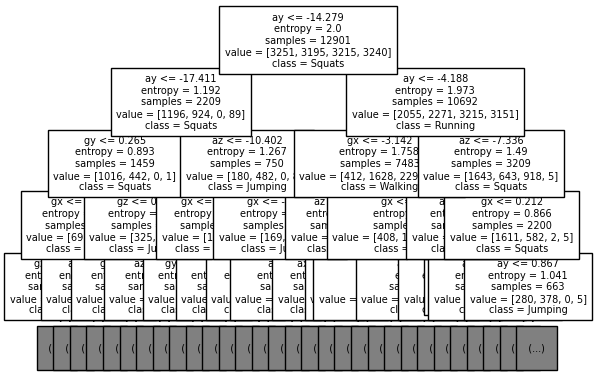

In [23]:
plot_tree(
    decision_tree=grid.best_estimator_,
    feature_names=['ax', 'ay', 'az', 'gx', 'gy', 'gz'],
    class_names=m_knn.movement_positions,
    fontsize=7,
    max_depth=4
)

#### Now it is time you look at the test set.

##### Using the tree-model above to predict the accuracy.


In [17]:
y_pred = grid.predict(X=m_knn.X_test)

In [18]:
accuracy_score(y_true=m_knn.y_test, y_pred=y_pred)

0.8858744800144691

#### Plot the confusion matrix as well

#### Validation set

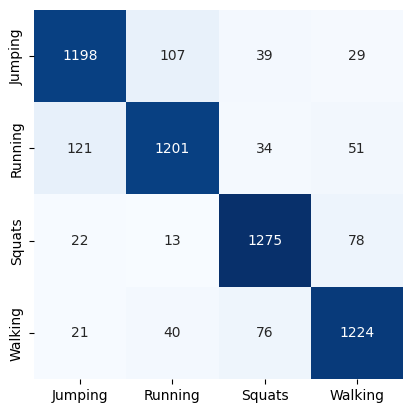

In [19]:
sns_cm(m_knn.y_test, y_pred)

##### Test set

In [20]:
dt_y_test_pred = grid.predict(X=m_knn.X_test_sample)

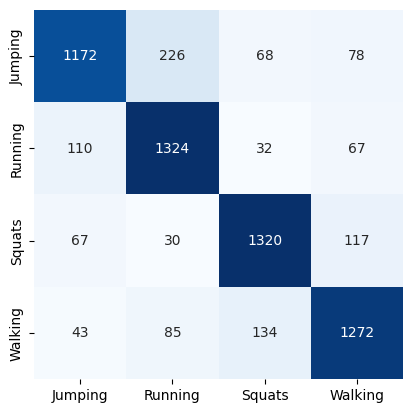

In [21]:
sns_cm(m_knn.y_true_sample, dt_y_test_pred)

##### Explain the difference between the accuracy for the validation set and the test set


##### Explain the result you see in the confusion matrix

In [22]:
display_accuracy(accuracy_score(y_true=m_knn.y_test, y_pred=y_pred), accuracy_score(y_true=m_knn.y_true_sample, y_pred=dt_y_test_pred))

Validation set accuracy: 0.8858744800144691
Test set accuracy: 0.8279902359641985


#### As a last step, it is time to compare the results from the KNN-model and the decision tree.

##### What is the difference between the accuracies?


##### Mean Score time


##### What is the difference between the confusion matrices?
